In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size = 100)

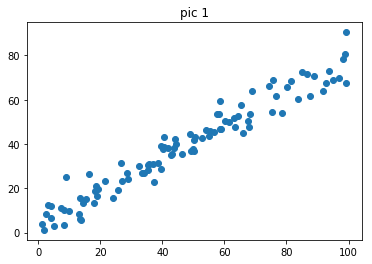

In [8]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("pic 1")
plt.show()

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)
pca.fit(X) 
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

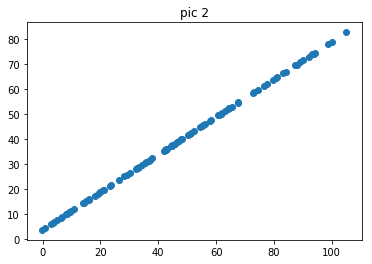

In [10]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.title("pic 2")
plt.show()

### 对比：
1. 不能说pic 2完全没有噪音
2. 不能说pic 1所有抖动都是噪音